# Jaswant Singh 
**Project:**
**The Flight Fare Data Analysis And Price prediction Model**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
flightfare = pd.read_csv("flight.csv")

In [3]:
flightfare

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
flightfare.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
flightfare.shape

(300153, 12)

We Have 12 Columns and 300153 rows

In [6]:
flightfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [7]:
flightfare.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

The dataset does not contain NULL Values

In [8]:
flightfare = flightfare.drop(['Unnamed: 0'], axis=1)

We have Remove "Unamed:0" column as it was of no use

In [9]:
flightfare.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [10]:
flightfare.tail()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


Describe the data that is mean count etc of the numerical columns in the data frame.

In [11]:
flightfare.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


Getting value counts of different columns

In [12]:
flightfare['duration'].value_counts()

2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
37.17       1
38.75       1
38.50       1
36.25       1
41.50       1
Name: duration, Length: 476, dtype: int64

In [13]:
flightfare['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [14]:
flightfare['stops'].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [15]:
flightfare['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

Our Dataset contains total of 6 Source City

In [16]:
flightfare['destination_city'].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

Similarly,the Destination City also are same 

**Mumbai And Delhi are Most frequently Travelled**

In [17]:
flightfare['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

C:\Users\Jaswant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


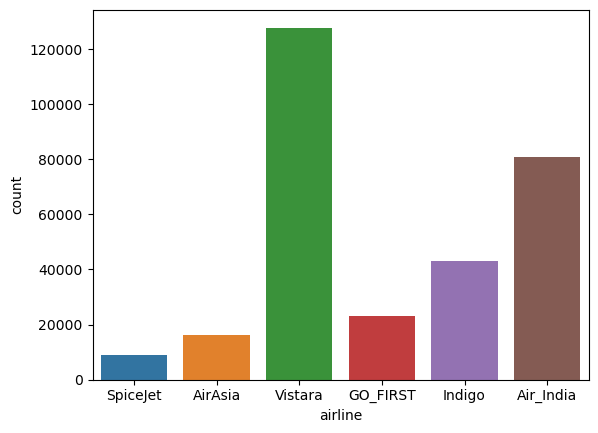

In [18]:
sns.countplot(flightfare["airline"])
plt.show()

**Here We can See that Vistara Sell Most Number of tickets and Spicejet lowest**

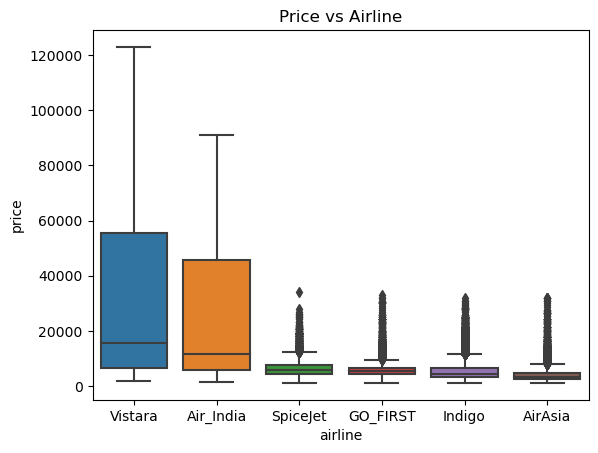

In [19]:
plt.title("Price vs Airline")
sns.boxplot(y = "price", x = "airline", data = flightfare.sort_values("price", ascending = False))
plt.show()

**We Can See Vistara & Air India had wide range of price variation in there tickets as compare to other 4 airlines**

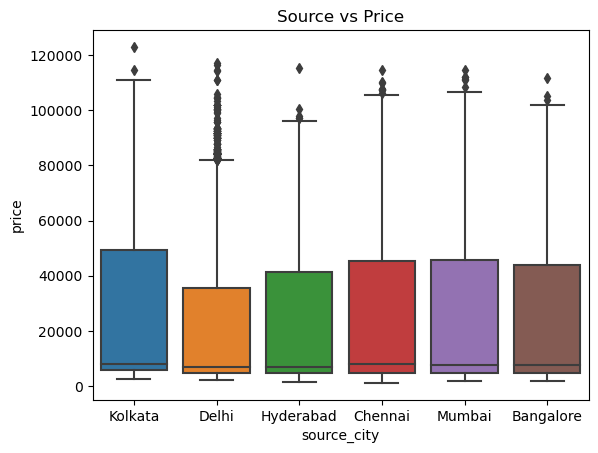

In [20]:
plt.title("Source vs Price")
sns.boxplot(y = "price", x = "source_city", data = flightfare.sort_values("price", ascending = False))
plt.show()

Source Doesn't have major affect on Price

<AxesSubplot:title={'center':'Airline With their Class Counts'}, xlabel='class', ylabel='count'>

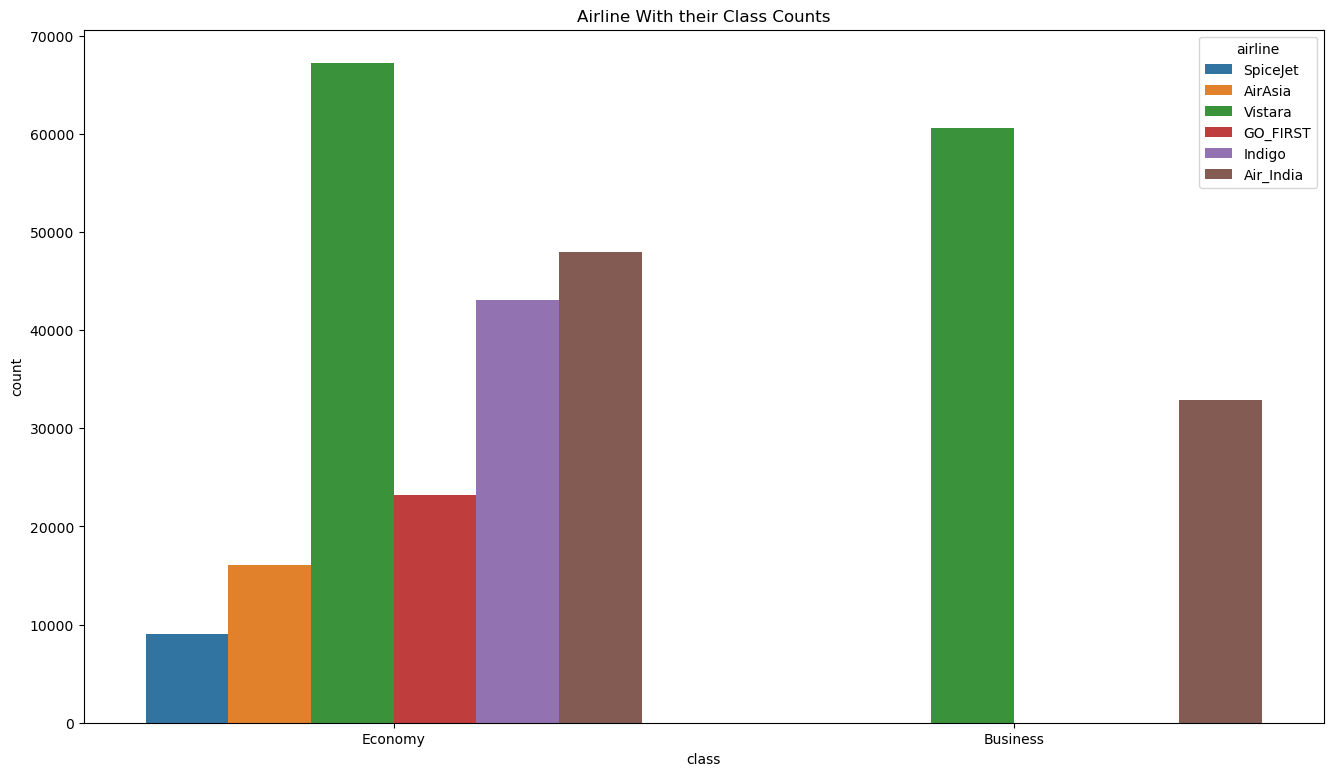

In [21]:
plt.figure(figsize = [16, 9])
plt.title("Airline With their Class Counts")
sns.countplot(data = flightfare, x = "class", hue = "airline")

# Checking Price range of each airline and each class

In [22]:
vistara=flightfare.loc[flightfare['airline']=='Vistara']
vistara

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


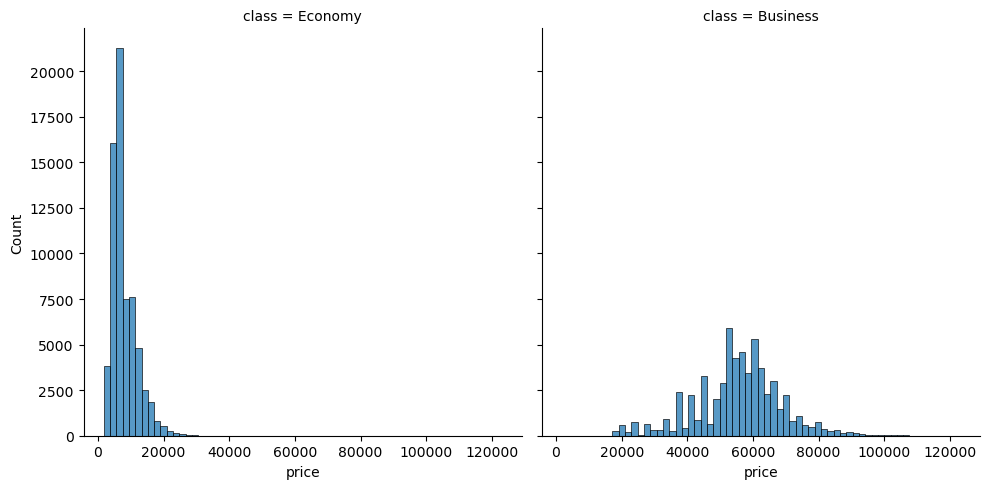

In [23]:
#checking price variation of vistara airlines
sns.displot(data=vistara, x="price", col="class" )
plt.show()

Approximate Range
Economy Class from 2000 to 20000  
Business Classs from 20000 to 100000 

In [24]:
vistara["price"].mean()

30396.53630170735

**The average price of vistara airline is 30k**

In [25]:
Air_India=flightfare.loc[flightfare['airline']=='Air_India']
Air_India

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
16,Air_India,AI-887,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.08,1,5955
17,Air_India,AI-665,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5955
23,Air_India,AI-441,Delhi,Evening,one,Night,Mumbai,Economy,3.75,1,5955
37,Air_India,AI-453,Delhi,Early_Morning,one,Afternoon,Mumbai,Economy,8.83,1,11900
40,Air_India,AI-504,Delhi,Night,one,Morning,Mumbai,Economy,11.00,1,12150
...,...,...,...,...,...,...,...,...,...,...,...
300143,Air_India,AI-440,Chennai,Early_Morning,one,Night,Hyderabad,Business,17.42,49,51345
300144,Air_India,AI-539,Chennai,Evening,one,Morning,Hyderabad,Business,18.92,49,51345
300145,Air_India,AI-430,Chennai,Morning,one,Morning,Hyderabad,Business,23.08,49,51345
300146,Air_India,AI-440,Chennai,Early_Morning,one,Morning,Hyderabad,Business,26.83,49,51345


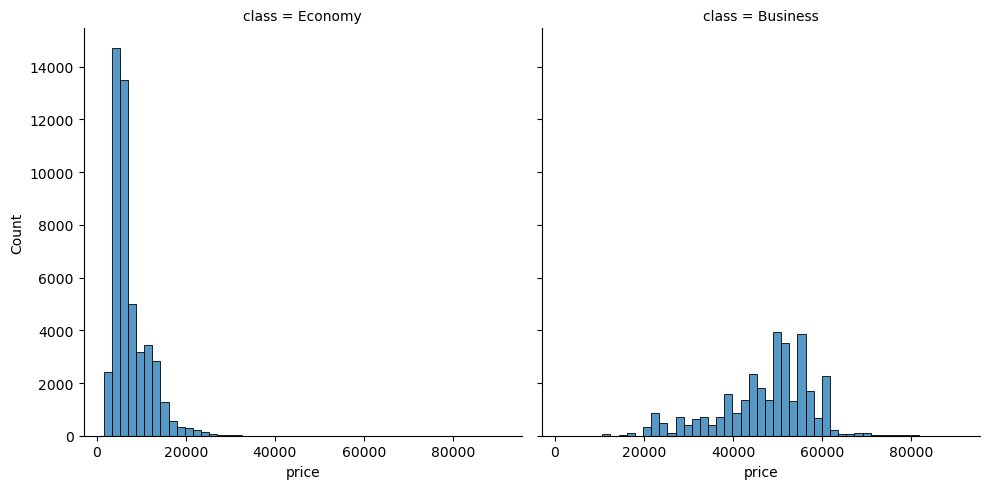

In [26]:
#checking price variation of Air India airlines
sns.displot(data=Air_India, x="price", col="class" )
plt.show()

Approximate Range
Economy Class from 2000 to 25000  
Business Classs from 20000 to 80000

In [27]:
Air_India["price"].mean()

23507.01911190229

**The average Price Of Air India airlines is 23.5k**

In [28]:
Indigo=flightfare.loc[flightfare['airline']=='Indigo']
Indigo

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
12,Indigo,6E-5001,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5955
13,Indigo,6E-6202,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.17,1,5955
14,Indigo,6E-549,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5955
15,Indigo,6E-6278,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
24,Indigo,6E-5328,Delhi,Morning,zero,Morning,Mumbai,Economy,2.50,1,6165
...,...,...,...,...,...,...,...,...,...,...,...
206612,Indigo,6E-156,Chennai,Night,zero,Night,Hyderabad,Economy,1.25,49,1551
206613,Indigo,6E-562,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.33,49,1551
206614,Indigo,6E-6215,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.33,49,1551
206615,Indigo,6E-193,Chennai,Evening,zero,Night,Hyderabad,Economy,1.33,49,1551


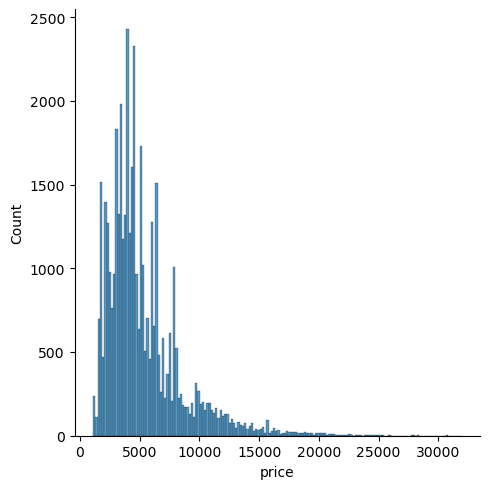

In [29]:
#checking price variation of Indigo airlines
sns.displot(data=Indigo, x="price")
plt.show()
# Here no need of taking col = class as in countplot of Airline With their Class Counts we have seen there is business class in only vistara & Air India

Approximate Range
Economy Class from 2000 to 20000

In [30]:
Indigo["price"].mean()

5324.216303339517

**The average Price Of Indigo airlines is 5.3k**

In [31]:
GO_FIRST=flightfare.loc[flightfare['airline']=='GO_FIRST']
GO_FIRST

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954
10,GO_FIRST,G8-392,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954
11,GO_FIRST,G8-338,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5954
20,GO_FIRST,G8-266,Delhi,Early_Morning,one,Evening,Mumbai,Economy,11.75,1,5954
...,...,...,...,...,...,...,...,...,...,...,...
206320,GO_FIRST,G8-911,Chennai,Afternoon,one,Night,Hyderabad,Economy,7.58,45,4933
206352,GO_FIRST,G8-504,Chennai,Afternoon,zero,Afternoon,Hyderabad,Economy,1.00,46,1105
206432,GO_FIRST,G8-504,Chennai,Afternoon,zero,Afternoon,Hyderabad,Economy,1.00,47,1105
206509,GO_FIRST,G8-504,Chennai,Afternoon,zero,Afternoon,Hyderabad,Economy,1.00,48,1105


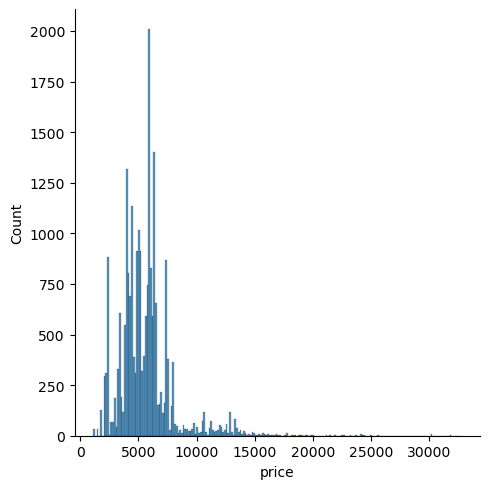

In [32]:
#checking price variation of go first airlines
sns.displot(data=GO_FIRST, x="price")
plt.show()

Approximate Range
Economy Class from 1500 to 15000

In [33]:
GO_FIRST["price"].mean()

5652.007595045959

**The average Price Of Go First airlines is 5.6k**

In [34]:
AirAsia=flightfare.loc[flightfare['airline']=='AirAsia']
AirAsia

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
18,AirAsia,I5-747,Delhi,Evening,one,Early_Morning,Mumbai,Economy,12.25,1,5949
19,AirAsia,I5-747,Delhi,Evening,one,Morning,Mumbai,Economy,16.33,1,5949
27,AirAsia,I5-744,Delhi,Morning,one,Afternoon,Mumbai,Economy,5.83,1,8869
48,AirAsia,I5-784,Delhi,Evening,one,Early_Morning,Mumbai,Economy,15.17,1,12539
...,...,...,...,...,...,...,...,...,...,...,...
206538,AirAsia,I5-1229,Chennai,Night,one,Morning,Hyderabad,Economy,9.25,48,1550
206539,AirAsia,I5-2462,Chennai,Night,one,Morning,Hyderabad,Economy,10.17,48,1550
206591,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,49,1105
206616,AirAsia,I5-1229,Chennai,Night,one,Morning,Hyderabad,Economy,9.25,49,1550


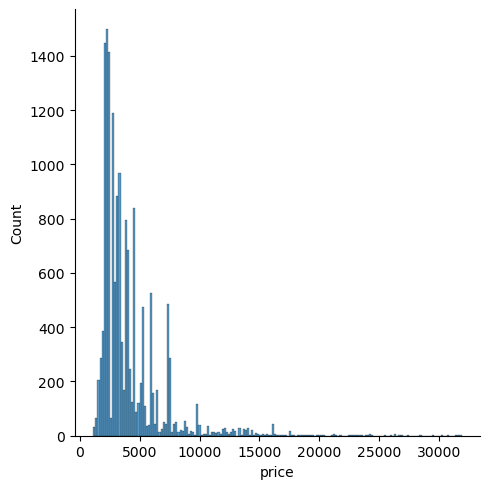

In [35]:
#checking price variation of go first airlines
sns.displot(data=AirAsia, x="price")
plt.show()

Approximate Range
Economy Class from 1500 to 15000

In [36]:
AirAsia["price"].mean()

4091.0727419555224

**The average Price Of AirAsia airlines is 4k**

In [37]:
SpiceJet=flightfare.loc[flightfare['airline']=='SpiceJet']
SpiceJet

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
28,SpiceJet,SG-8169,Delhi,Evening,zero,Night,Mumbai,Economy,2.33,1,10260
38,SpiceJet,SG-2976,Delhi,Evening,one,Night,Mumbai,Economy,4.50,1,12123
39,SpiceJet,SG-2976,Delhi,Evening,one,Morning,Mumbai,Economy,15.25,1,12123
...,...,...,...,...,...,...,...,...,...,...,...
205560,SpiceJet,SG-731,Chennai,Early_Morning,zero,Early_Morning,Hyderabad,Economy,1.25,37,1551
205644,SpiceJet,SG-731,Chennai,Early_Morning,zero,Early_Morning,Hyderabad,Economy,1.25,38,1106
205822,SpiceJet,SG-731,Chennai,Early_Morning,zero,Early_Morning,Hyderabad,Economy,1.25,40,1106
206005,SpiceJet,SG-731,Chennai,Early_Morning,zero,Early_Morning,Hyderabad,Economy,1.25,42,1106


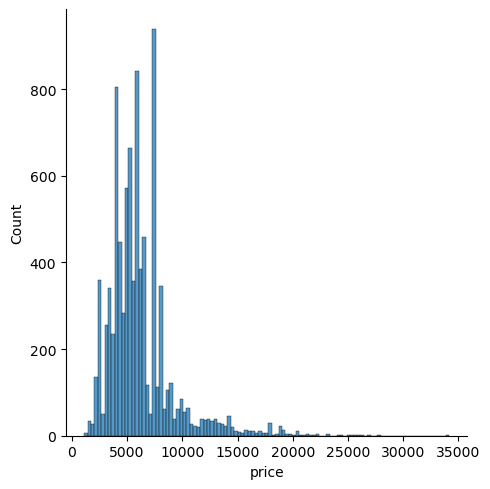

In [38]:
#checking price variation of go first airlines
sns.displot(data=SpiceJet, x="price")
plt.show()

Approximate Range
Economy Class from 1500 to 20000

In [39]:
SpiceJet["price"].mean()

6179.278881367218

**The average Price Of Spicejet airlines is 6.1k**

In [40]:
flightfare['price'].describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [41]:
ds=flightfare[flightfare['price']==1105]
ds


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
203807,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,16,1105
203808,GO_FIRST,G8-505,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,16,1105
203908,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,17,1105
203909,GO_FIRST,G8-505,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,17,1105
204003,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,18,1105
...,...,...,...,...,...,...,...,...,...,...,...
206601,Indigo,6E-7261,Chennai,Morning,one,Evening,Hyderabad,Economy,7.92,49,1105
206602,Indigo,6E-611,Chennai,Evening,one,Late_Night,Hyderabad,Economy,8.25,49,1105
206603,Indigo,6E-581,Chennai,Morning,one,Evening,Hyderabad,Economy,9.17,49,1105
206604,Indigo,6E-7127,Chennai,Afternoon,one,Night,Hyderabad,Economy,9.50,49,1105


In [42]:
ds['airline'].value_counts()

Indigo      236
AirAsia      32
GO_FIRST     32
Name: airline, dtype: int64

In [43]:
ds["source_city"].value_counts()

Chennai    300
Name: source_city, dtype: int64

**The Lowest price of flight is from chennai to hyderabad of airlines- Indigo, AirAsia, Go First**

In [44]:
dh=flightfare[flightfare['price']==123071]
dh

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
261377,Vistara,UK-772,Kolkata,Morning,one,Night,Delhi,Business,13.5,3,123071


**The Highest Price of Flight is from kolkata to Delhi Of business class from Airline Vistara**

In [45]:
flightfare.corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


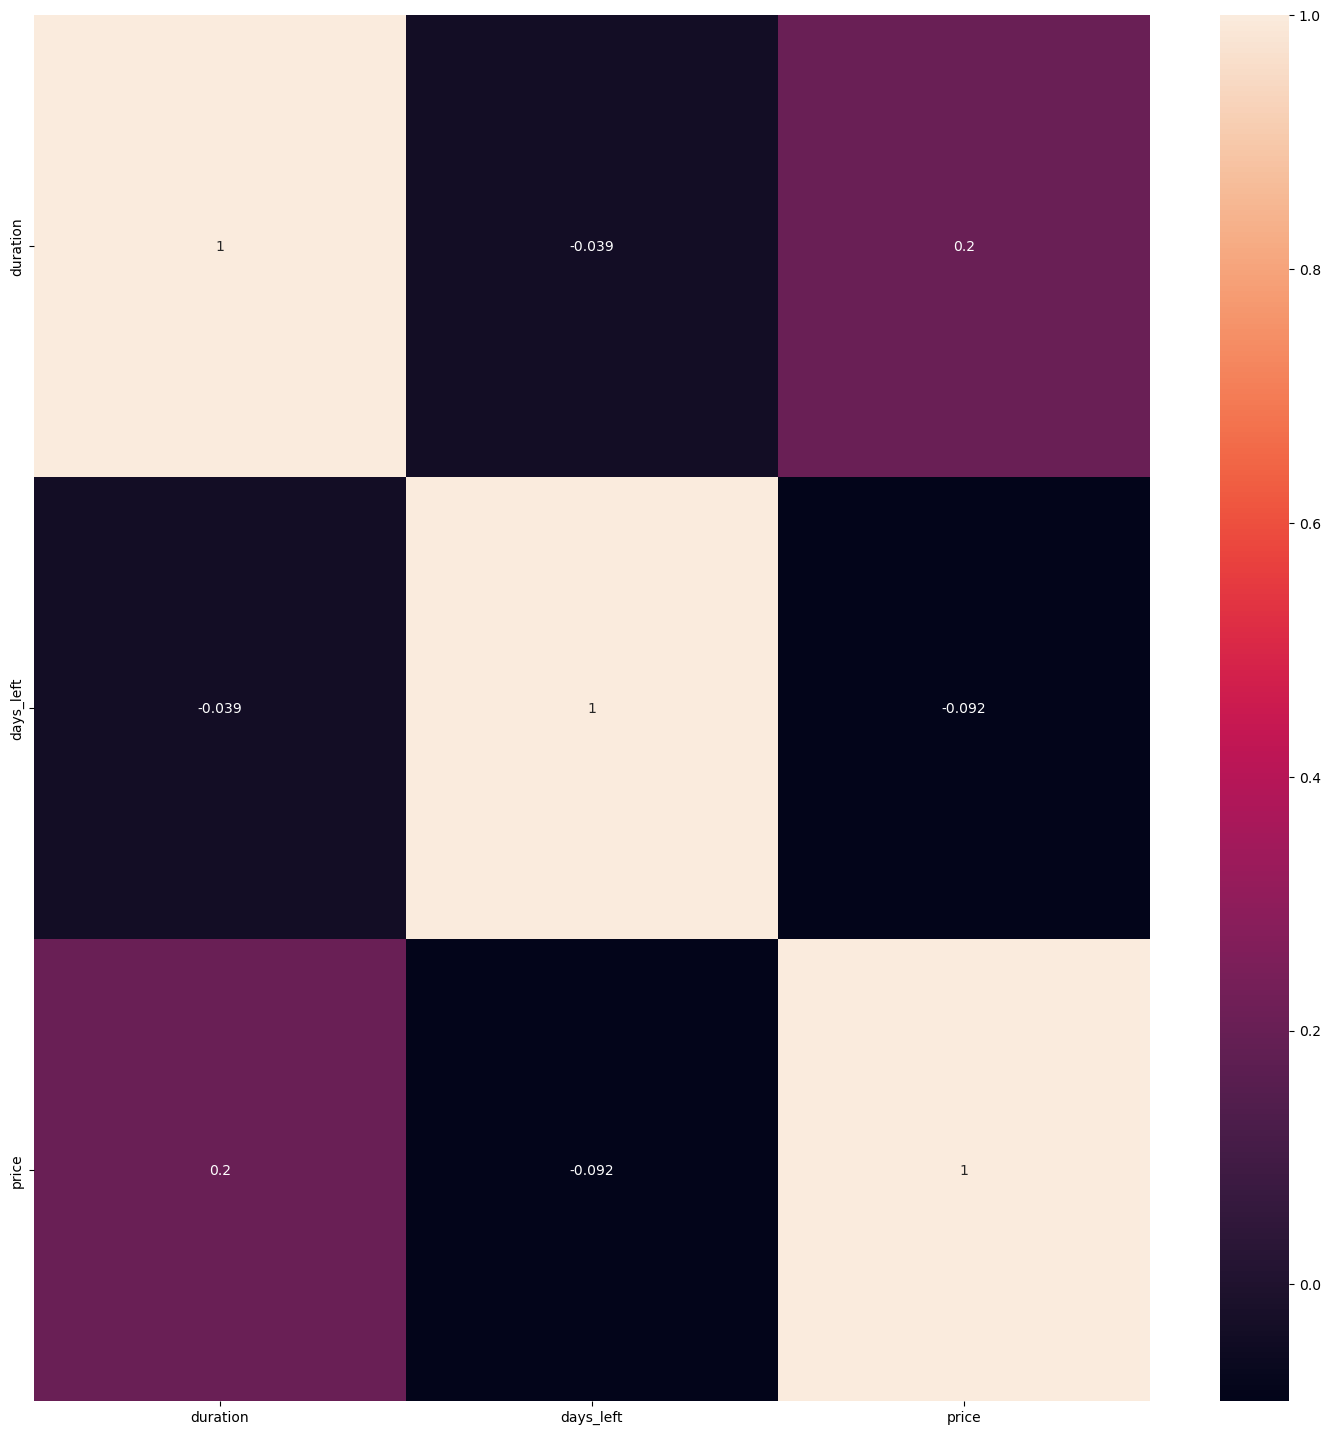

In [46]:
plt.figure(figsize = (18,18))
sns.heatmap(flightfare.corr(), annot = True)

plt.show()

In [47]:
df=flightfare.copy()

In [48]:
source = flightfare['source_city'].unique()
source = pd.Series(source, index=range(len(source)))
source

0        Delhi
1       Mumbai
2    Bangalore
3      Kolkata
4    Hyderabad
5      Chennai
dtype: object

In [49]:
destination = flightfare['destination_city'].unique()
destination = pd.Series(destination, index=range(len(destination)))
destination

0       Mumbai
1    Bangalore
2      Kolkata
3    Hyderabad
4      Chennai
5        Delhi
dtype: object

In [50]:
df['source_city'] = df['source_city'].map(dict(zip(source, range(len(source)))))
df['destination_city'] = df['destination_city'].map(dict(zip(destination, range(len(destination)))))

In [51]:
df.corr()['price']

source_city         0.026990
destination_city   -0.036952
duration            0.204222
days_left          -0.091949
price               1.000000
Name: price, dtype: float64

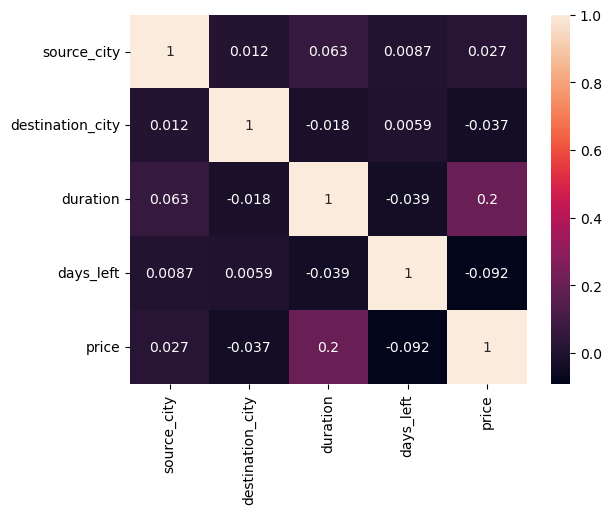

In [52]:
sns.heatmap(df.corr() , annot = True)
plt.show()

In [53]:
# Get unique values of 'class' column
class_values = flightfare['class'].unique()

# Create a dictionary to map unique values to integers
class_dict = {val: i for i, val in enumerate(class_values)}

# Use the map function to replace values with their corresponding integer
df['class'] = df['class'].map(class_dict)


In [54]:
df.corr()['price']

source_city         0.026990
destination_city   -0.036952
class               0.937860
duration            0.204222
days_left          -0.091949
price               1.000000
Name: price, dtype: float64

**here we can see class is highly correlated with price**

# Conclusion


 Vistara Is most popular airline it captures major market share and on second air india comes.



Vistara & Air India looks more succesful the reason might be they have there hands in both class economy as well as business even they have wide range of variety in their prices

 If we leave air india and Vistara then among other airlines Spiccejet has Highest Average price

 Vistara Sell Most Number of tickets and Spicejet lowest

Mumbai And Delhi are Most frequently Travelled cities

The Lowest price of flight is from chennai to hyderabad of airlines- Indigo, AirAsia, Go First

The Highest Price of Flight is from kolkata to Delhi Of business class from Airline Vistara

There is no relation of price from flight, stops, arrival time.

There is relation between price and class 

# Modelling

In [55]:
df.corr()['price']

source_city         0.026990
destination_city   -0.036952
class               0.937860
duration            0.204222
days_left          -0.091949
price               1.000000
Name: price, dtype: float64

In [56]:
#separating categorical and numerical columns
categorical_columns = []
numerical_columns = []

for column in df.columns:
    if (df[column].dtype == 'O'):
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)
        
print(categorical_columns)
print(numerical_columns)

['airline', 'flight', 'departure_time', 'stops', 'arrival_time']
['source_city', 'destination_city', 'class', 'duration', 'days_left', 'price']


In [57]:
def label_encoding(arr):
    uniq_cat = sorted(arr.unique())
    cat_to_num = {}
    for i in range(0, len(uniq_cat)):
        cat_to_num[uniq_cat[i]] = i     
    return cat_to_num

for i in categorical_columns:
    df[i+"_encoded"] = df[i].map(label_encoding(df[i]))

In [58]:
from sklearn.preprocessing import LabelEncoder

#doing this for all categorical_columns
for i in categorical_columns:
    label_encoder= LabelEncoder()
    encoded_label = label_encoder.fit_transform(df[i])
    df[i + "_encoded"] = encoded_label

In [59]:
label_encoder.inverse_transform([0,1,2,3,4,5])

array(['Afternoon', 'Early_Morning', 'Evening', 'Late_Night', 'Morning',
       'Night'], dtype=object)

In [60]:
df = df.drop(categorical_columns, axis = 1)

In [61]:
df

,source_city,destination_city,class,duration,days_left,price,airline_encoded,flight_encoded,departure_time_encoded,stops_encoded,arrival_time_encoded
0,0,0,0,2.17,1,5953,4,1408,2,2,5
1,0,0,0,2.33,1,5953,4,1387,1,2,4
2,0,0,0,2.17,1,5956,0,1213,1,2,1
3,0,0,0,2.25,1,5955,5,1559,4,2,0
4,0,0,0,2.33,1,5955,5,1549,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,3,1,10.08,49,69265,5,1477,4,0,2
300149,5,3,1,10.42,49,77105,5,1481,0,0,5
300150,5,3,1,13.83,49,79099,5,1486,1,0,5
300151,5,3,1,10.00,49,81585,5,1483,1,0,2


In [62]:
df.pop('source_city')

0         0
1         0
2         0
3         0
4         0
         ..
300148    5
300149    5
300150    5
300151    5
300152    5
Name: source_city, Length: 300153, dtype: int64

In [63]:
df.pop('destination_city')

0         0
1         0
2         0
3         0
4         0
         ..
300148    3
300149    3
300150    3
300151    3
300152    3
Name: destination_city, Length: 300153, dtype: int64

In [64]:
df

,class,duration,days_left,price,airline_encoded,flight_encoded,departure_time_encoded,stops_encoded,arrival_time_encoded
0,0,2.17,1,5953,4,1408,2,2,5
1,0,2.33,1,5953,4,1387,1,2,4
2,0,2.17,1,5956,0,1213,1,2,1
3,0,2.25,1,5955,5,1559,4,2,0
4,0,2.33,1,5955,5,1549,4,2,4
...,...,...,...,...,...,...,...,...,...
300148,1,10.08,49,69265,5,1477,4,0,2
300149,1,10.42,49,77105,5,1481,0,0,5
300150,1,13.83,49,79099,5,1486,1,0,5
300151,1,10.00,49,81585,5,1483,1,0,2


# Linear Regression

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x = df.drop("price" , axis = 1).values
y = df['price'].values

In [67]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.3 , random_state= 38,shuffle=True)

In [68]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [69]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [70]:
y_pred = lin_reg.predict(x_train)

In [71]:
y_pred_test = lin_reg.predict(x_test)

In [120]:
df_test = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred_test})
df_test.head(10)

,Y_test,Y_pred
0,60160,54791.280221
1,4165,4853.658068
2,5817,5619.740508
3,13467,10475.765652
4,49896,51312.934159
5,3393,5493.674209
6,4792,11565.606444
7,3862,-215.641489
8,42457,54056.462219
9,3916,4622.509313


In [77]:
#model evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
print("For Training Set")

print("MSE:", mean_squared_error(y_train, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred)))

print("MAE:", mean_absolute_error(y_pred, y_train))
print("MAPE:", mean_absolute_percentage_error(y_train, y_pred))

print("r2_score:", r2_score(y_train, y_pred))


For Training Set
MSE: 49191756.66580903
RMSE: 7013.6835304858905
MAE: 4632.190793851782
MAPE: 0.4350422410476322
r2_score: 0.9045844813752305


In [78]:
#model evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
print("For Testing Set")

print("MSE:", mean_squared_error(y_test, y_pred_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_test))

print("r2_score:", r2_score(y_test, y_pred_test))


For Testing Set
MSE: 49213955.332759544
RMSE: 7015.265877553005
MAE: 4631.514409563971
MAPE: 0.4337329280965736
r2_score: 0.9043149185133258


In [72]:
print(lin_reg.score(x_train , y_train))
print(lin_reg.score(x_test , y_test))

0.9045844813752305
0.9043149185133258


**Here we get R2 Score of 90 on Training as well as Testing Dataset**

# Ensemble Algorithm| ADA Boost

In [154]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor(n_estimators = 100,
                        learning_rate = 0.2)

adb.fit(x_train, y_train)

AdaBoostRegressor(learning_rate=0.2, n_estimators=100)

In [157]:
ypred_train_ad = adb.predict(x_train)
ypred_test_ad = adb.predict(x_test)

In [162]:
df_test_ad = pd.DataFrame({"Y_test": y_test , "Y_pred_ad" : ypred_test_ad})
df_test_ad.head(20)

,Y_test,Y_pred_ad
0,60160,59701.397383
1,4165,5591.967748
2,5817,5592.410412
3,13467,11415.053708
4,49896,49554.038064
5,3393,5592.410412
6,4792,9467.065855
7,3862,5591.967748
8,42457,59214.015348
9,3916,5591.967748


In [159]:
#model evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
print("For Training Set")

print("MSE:", mean_squared_error(y_train, ypred_train_ad))
print("RMSE:", np.sqrt(mean_squared_error(y_train, ypred_train_ad)))

print("MAE:", mean_absolute_error(ypred_train_ad, y_train))
print("MAPE:", mean_absolute_percentage_error(y_train, ypred_train_ad))

print("r2_score:", r2_score(y_train, ypred_train_ad))

For Training Set
MSE: 33436564.222763125
RMSE: 5782.4358381881875
MAE: 3669.0975827045227
MAPE: 0.32331129875320164
r2_score: 0.935144273500547


In [160]:
#model evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
print("For Testing Set")

print("MSE:", mean_squared_error(y_test, ypred_test_ad))
print("RMSE:", np.sqrt(mean_squared_error(y_test, ypred_test_ad)))

print("MAE:", mean_absolute_error(y_test, ypred_test_ad))
print("MAPE:", mean_absolute_percentage_error(y_test, ypred_test_ad))

print("r2_score:", r2_score(y_test, ypred_test_ad))


For Testing Set
MSE: 33356291.137091868
RMSE: 5775.490553805093
MAE: 3673.504610357409
MAPE: 0.32355970374418963
r2_score: 0.9351464556350891


In [156]:
print(adb.score(x_train , y_train))
print(adb.score(x_test , y_test))

0.935144273500547
0.9351464556350891


**Here we get R2 Score of 93 on Training as well as Testing Dataset**

# Random Forest

In [144]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [145]:
y_pred_rfg = reg_rf.predict(x_train)

In [146]:
y_pred_rfg_test = reg_rf.predict(x_test)

In [147]:
#model evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
print("For Training Set")

print("MSE:", mean_squared_error(y_train, y_pred_rfg))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_rfg)))

print("MAE:", mean_absolute_error(y_pred_rfg, y_train))
print("MAPE:", mean_absolute_percentage_error(y_train, y_pred_rfg))

print("r2_score:", r2_score(y_train, y_pred_rfg))

For Training Set
MSE: 1350625.2856125883
RMSE: 1162.164052796587
MAE: 478.81359430542267
MAPE: 0.031687361452559605
r2_score: 0.9973802396818241


In [148]:
#model evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
print("For Testing Set")

print("MSE:", mean_squared_error(y_test, y_pred_rfg_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rfg_test)))

print("MAE:", mean_absolute_error(y_test, y_pred_rfg_test))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_rfg_test))

print("r2_score:", r2_score(y_test, y_pred_rfg_test))


For Testing Set
MSE: 7795162.607063504
RMSE: 2791.9818421801215
MAE: 1182.6681328921784
MAPE: 0.07977774953055405
r2_score: 0.9848441206520491


In [149]:
df_test_rfg = pd.DataFrame({"Y_test": y_test , "Y_pred_rfg" : y_pred_rfg_test})
df_test_rfg.head(20)

,Y_test,Y_pred_rfg
0,60160,62307.040000
1,4165,4165.000000
2,5817,5913.550000
3,13467,11637.300000
4,49896,49896.000000
5,3393,3379.410000
6,4792,5584.090000
7,3862,3862.000000
8,42457,42457.000000
9,3916,4253.240000


In [150]:
print(reg_rf.score(x_train , y_train))
print(reg_rf.score(x_test , y_test))

0.9973802396818241
0.9848441206520491


**Here We get R2 Score of 99 on Training Dataset**

**Here we get R2 Score of 98 on Testing Dataset**

# Among our three algorithms Random Forest Regression Perform well